Head of the dataset:


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 10

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000



Categorical Feature Distributions:

Value counts for 'checking_balance':
checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

Value counts for 'credit_history':
credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64

Value counts for 'purpose':
purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

Value counts for 'savings_balance':
savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64

Value counts for 'employment_duration':
employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64

Value counts for 'other_credit':
other_credit
none 

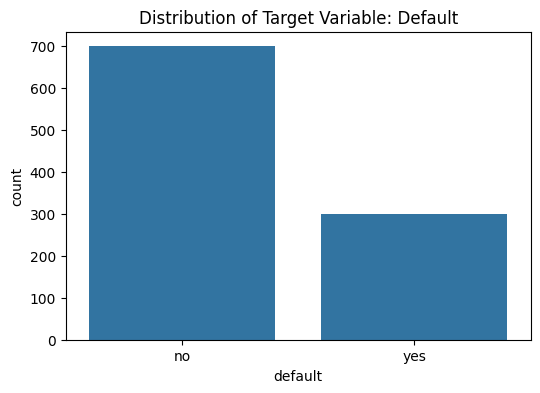

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("credit.csv")

# Display the first few rows
print("Head of the dataset:")
display(df.head())

# Summary of the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics for numeric columns
print("\nStatistical Summary:")
display(df.describe())

# Value counts for categorical columns
print("\nCategorical Feature Distributions:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='default')
plt.title('Distribution of Target Variable: Default')
plt.show()





In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables using LabelEncoder
data = df.copy()
label_encoders = {}
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
X = data.drop('default', axis=1)
y = data['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete. Shapes:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")


Preprocessing complete. Shapes:
X_train: (800, 16), X_test: (200, 16)


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       140
           1       0.65      0.33      0.44        60

    accuracy                           0.74       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



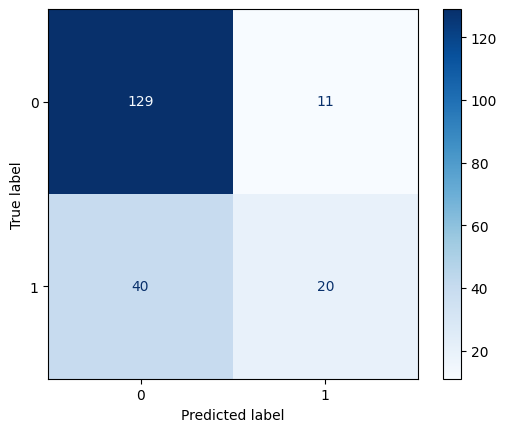

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


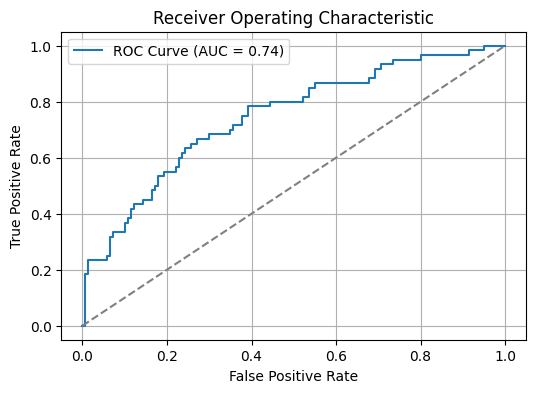

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.grid(True)
plt.show()


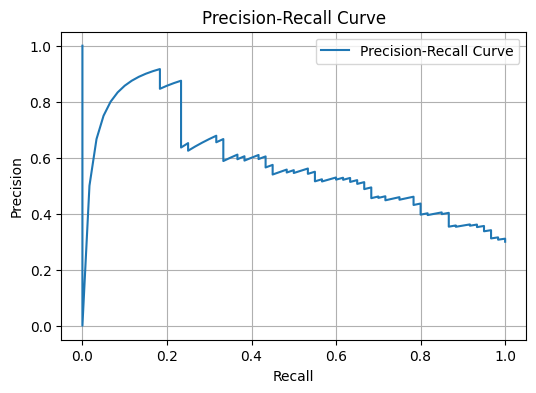

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()


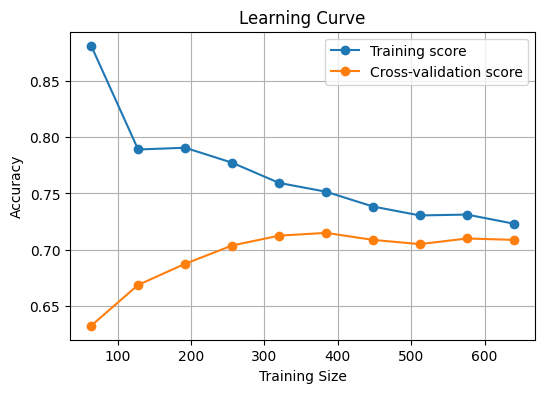

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:

import ipywidgets as widgets
from IPython.display import display

# Dropdown helper
def make_dropdown(options, description):
    return widgets.Dropdown(options=options, description=description)

# Categorical inputs with exact dataset values
checking_balance = make_dropdown(['< 0 DM', '1 - 200 DM', '> 200 DM', 'unknown'], 'Checking:')
savings_balance = make_dropdown(['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM', 'unknown'], 'Savings:')
credit_history = make_dropdown(['critical', 'poor', 'good', 'perfect'], 'Credit Hist:')
purpose = make_dropdown(['car', 'education', 'furniture', 'business', 'other'], 'Purpose:')
employment_duration = make_dropdown(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed', '< 1 year'], 'Employment:')
housing = make_dropdown(['own', 'rent', 'other'], 'Housing:')
job = make_dropdown(['unemployed', 'unskilled', 'skilled', 'management'], 'Job:')
other_credit = make_dropdown(['none', 'bank', 'stores'], 'Other Credit:')
phone = make_dropdown(['yes', 'no'], 'Phone:')

# Numeric inputs
months_loan_duration = widgets.IntText(description="Loan Duration:")
amount = widgets.IntText(description="Loan Amount:")
percent_of_income = widgets.IntSlider(min=1, max=4, step=1, description="% Income:")
age = widgets.IntSlider(min=18, max=75, step=1, description="Age:")
years_at_residence = widgets.IntSlider(min=1, max=4, step=1, description="Years at Res:")
existing_loans_count = widgets.IntSlider(min=1, max=4, step=1, description="Loans:")
dependents = widgets.IntSlider(min=1, max=2, step=1, description="Dependents:")

# Predict button
run_button = widgets.Button(description="Predict Credit Risk")

# Display inputs
inputs = [checking_balance, months_loan_duration, credit_history, purpose, amount,
          savings_balance, employment_duration, percent_of_income, years_at_residence,
          age, other_credit, housing, existing_loans_count, job, dependents, phone]
display(*inputs, run_button)

# On button click
def on_button_click(b):
    # Collect user inputs
    input_dict = {
        'checking_balance': checking_balance.value,
        'months_loan_duration': months_loan_duration.value,
        'credit_history': credit_history.value,
        'purpose': purpose.value,
        'amount': amount.value,
        'savings_balance': savings_balance.value,
        'employment_duration': employment_duration.value,
        'percent_of_income': percent_of_income.value,
        'years_at_residence': years_at_residence.value,
        'age': age.value,
        'other_credit': other_credit.value,
        'housing': housing.value,
        'existing_loans_count': existing_loans_count.value,
        'job': job.value,
        'dependents': dependents.value,
        'phone': phone.value
    }

    # Create DataFrame
    user_input_df = pd.DataFrame([input_dict])

    # Encode categorical columns
    for col in user_input_df.columns:
        if col in label_encoders:
            user_input_df[col] = label_encoders[col].transform(user_input_df[col])

    # ✅ Reorder columns to match model training order
    user_input_df = user_input_df[X.columns]

    # Scale
    user_input_scaled = scaler.transform(user_input_df)

    # Predict
    prediction = model.predict(user_input_scaled)[0]
    probability = model.predict_proba(user_input_scaled)[0][prediction]

    # Show result
    if prediction == 1:
        print(f"🔴 High Credit Risk! (Confidence: {probability:.2%})")
    else:
        print(f"🟢 Low Credit Risk. (Confidence: {probability:.2%})")

# Connect button
run_button.on_click(on_button_click)


Dropdown(description='Checking:', options=('< 0 DM', '1 - 200 DM', '> 200 DM', 'unknown'), value='< 0 DM')

IntText(value=0, description='Loan Duration:')

Dropdown(description='Credit Hist:', options=('critical', 'poor', 'good', 'perfect'), value='critical')

Dropdown(description='Purpose:', options=('car', 'education', 'furniture', 'business', 'other'), value='car')

IntText(value=0, description='Loan Amount:')

Dropdown(description='Savings:', options=('< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM', 'unknown')…

Dropdown(description='Employment:', options=('> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed', '< 1 yea…

IntSlider(value=1, description='% Income:', max=4, min=1)

IntSlider(value=1, description='Years at Res:', max=4, min=1)

IntSlider(value=18, description='Age:', max=75, min=18)

Dropdown(description='Other Credit:', options=('none', 'bank', 'stores'), value='none')

Dropdown(description='Housing:', options=('own', 'rent', 'other'), value='own')

IntSlider(value=1, description='Loans:', max=4, min=1)

Dropdown(description='Job:', options=('unemployed', 'unskilled', 'skilled', 'management'), value='unemployed')

IntSlider(value=1, description='Dependents:', max=2, min=1)

Dropdown(description='Phone:', options=('yes', 'no'), value='yes')

Button(description='Predict Credit Risk', style=ButtonStyle())

🟢 Low Credit Risk. (Confidence: 90.79%)
